In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Define the base directory where the Trh directories are located
base_dir = r"C:\Users\nnina\Documents\BioLab_C\Current_experiments_C\2024.07.24_Live_Cells_Actin_Photo_bleaching"

# Define the directory names
dir_names = ["Trh_5000", "Trh_10000", "Trh_15000", "Trh_20000", "Trh_25000", "Trh_30000"]

# Initialize an empty dataframe
all_data = pd.DataFrame()

# Loop over the directory names
for dir_name in dir_names:
    # Construct the full path to the file
    file_path = os.path.join(base_dir, dir_name, "analysis_data", "agg_stat", "cell_stat.csv")

    # Check if the file exists
    if os.path.isfile(file_path):
        # Read the file into a dataframe
        df = pd.read_csv(file_path)

        # Extract the Trh value from the directory name
        trh_value = int(dir_name.split("_")[1])

        # Add a new column "Trh" to the dataframe
        df["Trh"] = trh_value

        # Append the dataframe to the main dataframe
        all_data = pd.concat([all_data, df])


In [43]:
# Filter the dataframe to exclude 'img_7'
# Filter the dataframe to exclude the specified file
all_data = all_data[all_data['Image_name'] != 'mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-07.czi']
all_data.columns

Index(['Image_name', 'Img_num', 'Cell_num', 'Nucleus_volume, cubic_micrometre',
       'Nucleus_length, micrometre', 'Nucleus_width, micrometre',
       'Nucleus_high, micrometre', 'Nucleus_total_intensity',
       'Total_fiber_num', 'Cap_fiber_num', 'Bottom_fiber_num',
       'Total_fiber_volume, cubic_micrometre',
       'Cap_fiber_volume, cubic_micrometre',
       'Bottom_fiber_volume, cubic_micrometre',
       'Total_fiber_length, micrometre', 'Cap_fiber_length, micrometre',
       'Bottom_fiber_length, micrometre', 'Fiber_intensity_whole',
       'Fiber_intensity_cap', 'Fiber_intensity_bottom',
       'F-actin_signal_intensity_whole', 'F-actin_signal_intensity_cap',
       'F-actin_signal_intensity_bottom', 'Branching_nodes_total, #',
       'Branching_nodes_cap, #', 'Branching_nodes_bottom, #', 'Trh'],
      dtype='object')

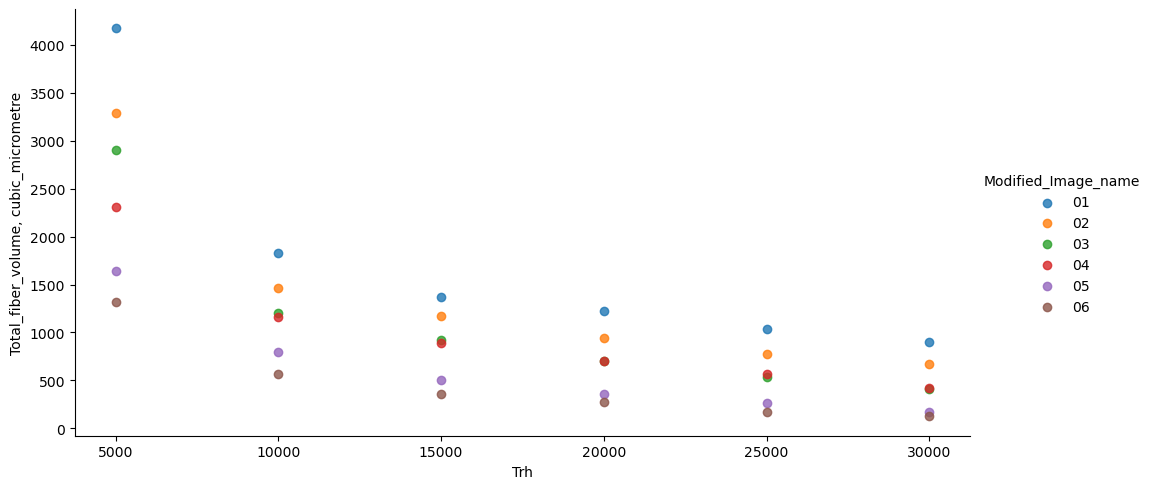

In [52]:
# Create a new column with the modified image names
all_data['Modified_Image_name'] = all_data['Image_name'].str.split('.').str[0].str[-2:]


# Define the Trh values you want to show
trh_values = [5000, 10000, 15000, 20000, 25000, 30000]

# Filter the dataframe
filtered_data = all_data[all_data['Trh'].isin(trh_values)]

# Create the scatter plot with the modified image names
sns.lmplot(x="Trh", y="Total_fiber_volume, cubic_micrometre", hue="Modified_Image_name", data=filtered_data, fit_reg=False, height=5, aspect=2)

# Set the x-axis tick locations and labels
plt.xticks(trh_values, trh_values)

# Display the plot
plt.show()

Text(0.5, 1.0, 'Total_fiber_num')

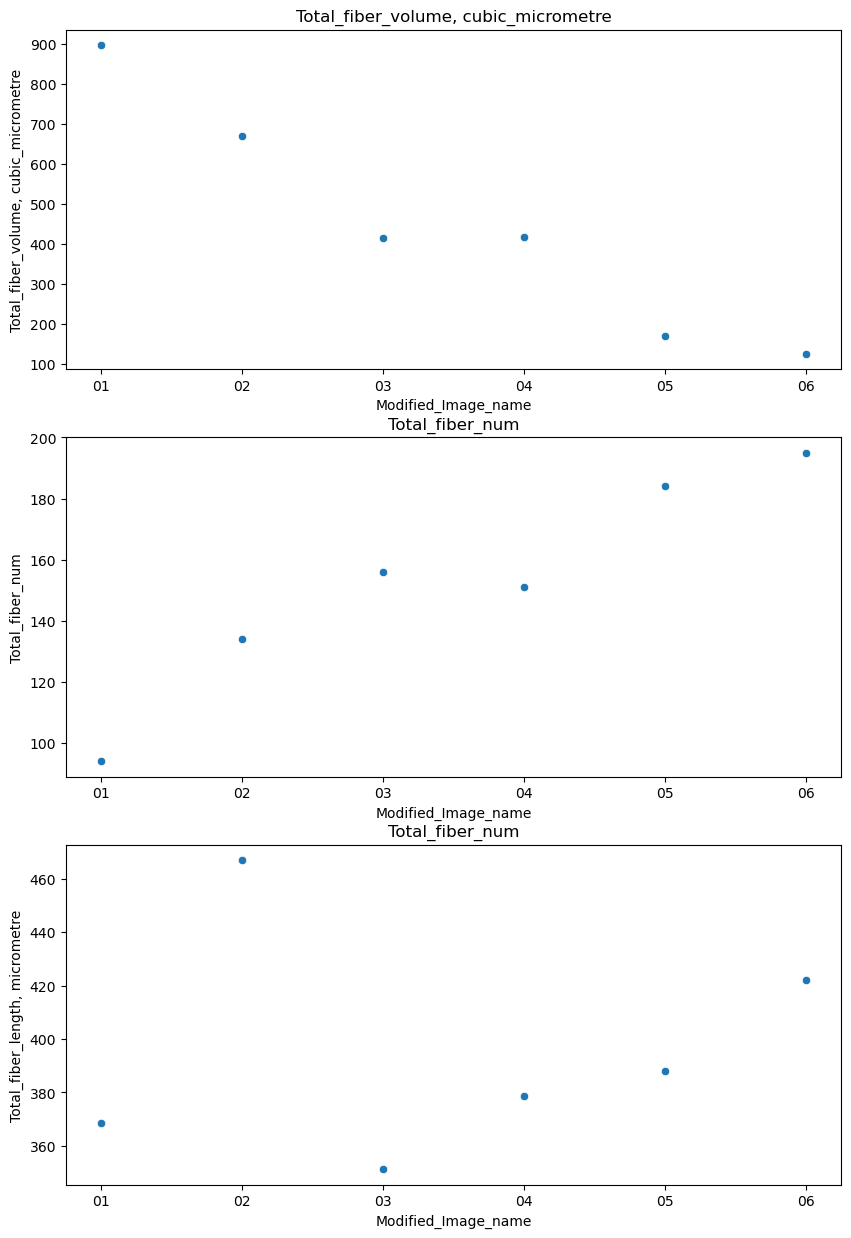

In [51]:

# Filter the dataframe to exclude the specified file
all_data = all_data[all_data['Image_name'] != 'mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-07.czi']

# Create a new column with the modified image names
all_data['Modified_Image_name'] = all_data['Image_name'].str.split('.').str[0].str[-2:]

# Define the image names you want to show
image_names = ["mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-01.czi",
               "mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-02.czi",
               "mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-03.czi",
               "mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-04.czi",
               "mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-05.czi",
               "mNEON-5ng_L3000-7_5_Far-red-NO WASHING-PhotoBl1-06.czi"]

# Filter the dataframe
filtered_data = all_data[(all_data['Trh'] == 30000) & (all_data['Image_name'].isin(image_names))]

# Create a figure with three subplots
fig, axs = plt.subplots(3, figsize=(10, 15))

# Create a scatter plot for "Total_fiber_volume, cubic_micrometre"
sns.scatterplot(x='Modified_Image_name', y='Total_fiber_volume, cubic_micrometre', data=filtered_data, ax=axs[0])
axs[0].set_title('Total_fiber_volume, cubic_micrometre')

# Create a scatter plot for "Total_fiber_num"
sns.scatterplot(x='Modified_Image_name', y='Total_fiber_num', data=filtered_data, ax=axs[1])
axs[1].set_title('Total_fiber_num')

# Create a scatter plot for "Total_fiber_num"
sns.scatterplot(x='Modified_Image_name', y='Total_fiber_length, micrometre', data=filtered_data, ax=axs[2])
axs[2].set_title('Total_fiber_num')